<a href="https://colab.research.google.com/github/AliHasan-786/Handwritten-Digit-Classification/blob/main/Handwritten_Digit_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 107612078.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20611824.71it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27626325.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3982966.50it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#verify the number of training and testing samples in the dataset
print("number of training: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training: 60000
number of testing samples: 10000


In [ ]:
#Each sample in the dataset is a pair of image and label.
#.type() for datatype and .size() for size of the first element in the training data
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

#Samples can be accessed from a dataset using list indexing
#The first sample in the dataset is a FloatTensor and it is a 28x28 pixel image in grayscale, hence the size [1,28,28]

datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


In [ ]:
#check the label of first two training samples
print("label of the first training sample: ", train_dataset[0][1])
print("label of the second training sample: ", train_dataset[1][1])

#From the above, you can see that the first two images in the training set represent "5" and "0".
#Let's show these two images to confirm

label of the first training sample:  5
label of the second training sample:  0


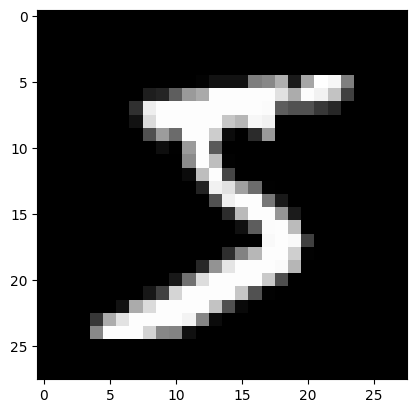

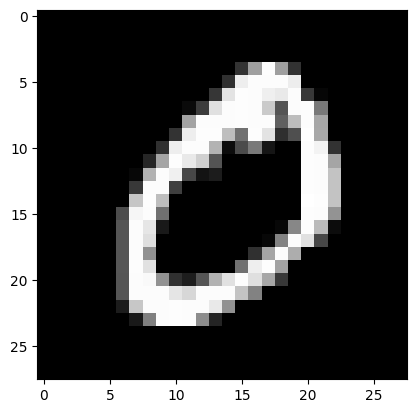

In [ ]:
import matplotlib.pyplot as plt

img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap = 'gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap = 'gray')
plt.show()

In [ ]:
#Usually you do not use the dataset directly in training but through a DataLoader class
#This allows you to read data in batches, not samples

from torch.utils.data import DataLoader

#load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset = train_dataset, batch_size = batach_size, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batach_size, shuffle = False)

#In the following, data is loaded into DataLoader with batch size at 32


In [ ]:
#Build the Model with nn.Module

#build custom module for logistic regression
class LogisticRegression(torch.nn.Module):
  #build the constructor
  def __init__(self, n_inputs, n_outputs):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(n_inputs, n_outputs)
    #make predictions
  def forward (self,x ):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

#The model will take a 28x28 pixel image of handwritten digits as input and classify them into one of the 10 output classes of digits 0 to 9.


In [ ]:
#instantiate the model
n_inputs = 28*28 #makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [ ]:
'''
The model will be trained with stochastic gradient descent
as the optimizer with learning rate 0.001 and cross-entropy as the loss metric
Then, the model is trained for 50 epochs.

Note that you have use view() method to flatten the image matrices into rows to
fit the same of the logistic regression model input
'''

# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.1356029510498047. Accuracy: 65.96
Epoch: 1. Loss: 2.1030919551849365. Accuracy: 74.16
Epoch: 2. Loss: 2.0660693645477295. Accuracy: 77.58
Epoch: 3. Loss: 2.002660036087036. Accuracy: 79.54
Epoch: 4. Loss: 1.9995379447937012. Accuracy: 80.8
Epoch: 5. Loss: 1.915931224822998. Accuracy: 81.55
Epoch: 6. Loss: 1.906923532485962. Accuracy: 82.09
Epoch: 7. Loss: 1.9351377487182617. Accuracy: 82.42
Epoch: 8. Loss: 1.8414857387542725. Accuracy: 82.72
Epoch: 9. Loss: 1.9055655002593994. Accuracy: 82.98
Epoch: 10. Loss: 1.8201239109039307. Accuracy: 83.23
Epoch: 11. Loss: 1.780746340751648. Accuracy: 83.42
Epoch: 12. Loss: 1.7629055976867676. Accuracy: 83.6
Epoch: 13. Loss: 1.822615623474121. Accuracy: 83.84
Epoch: 14. Loss: 1.7773298025131226. Accuracy: 84.04
Epoch: 15. Loss: 1.784067153930664. Accuracy: 84.19
Epoch: 16. Loss: 1.779587984085083. Accuracy: 84.25
Epoch: 17. Loss: 1.7517812252044678. Accuracy: 84.36
Epoch: 18. Loss: 1.7247920036315918. Accuracy: 84.55
Epoch: 19. L

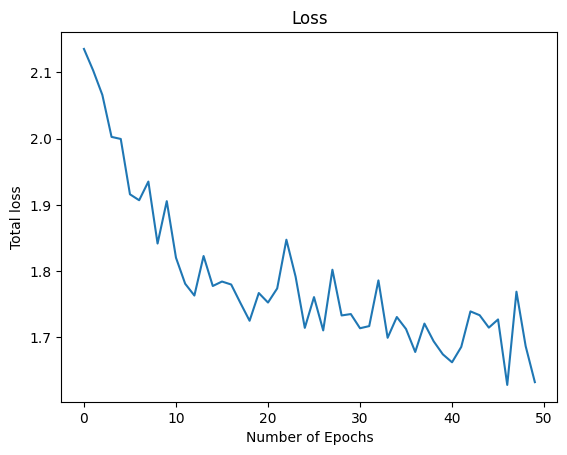

In [ ]:
#The model achieved an accuracy of around 86% by training the model for only 50 epochs
#Accuracy can be improved further if the model is trained longer
#Let's visualize how the graphs for loss and accuracy looks like. The following is the loss:
plt.plot(Loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Total loss")
plt.title("Loss")
plt.show()

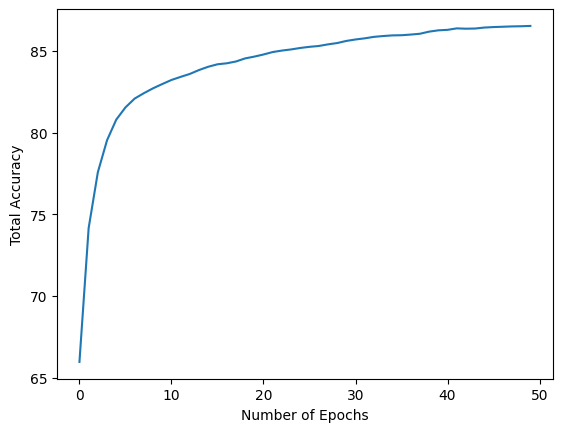

In [ ]:
#For accuracy
plt.plot(acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Total Accuracy")
plt.show()